### Get Count of Each Jargon Term in Each PubMed Document

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
jargon = pd.read_csv('../data/jargon.csv')
jargon.head()

,jargon_term
0,A/B testing
1,accuracy
2,action
3,activation function
4,active learning


In [3]:
pubmed = pd.read_csv('../data/pubmed_nltk_nostem_preproc_strings.csv').set_index('pmid')


In [4]:
pubmed.columns

Index(['date', 'citations', 'len_text', 'len_title', 'days_live', 'fulltext'], dtype='object')

In [5]:
pubmed.drop(columns=['date', 'len_text', 'len_title', 'days_live'], inplace=True)

In [6]:
# create a list to store the individual document dictionaries 
jargon_count_list = []

# iterate through each document
for document in pubmed['fulltext']:
    
    #create dictionary for each document to store the counts for each term
    doc_dict = {}

    #set up a counter variable to keep track of the total uses of all jargon terms
    total_jargon_count = 0  
    
    #iterate through the list of jargon terms
    for term in jargon['jargon_term']:
    
        #set up a counter for each individual jargon term 
        term_count = 0
        
        #count the number of times each indivivdual jargon term shows up in the document & store it 
        term_count = document.count(term)
        
        #store the term count in the individual document's dictionary
        doc_dict[term] = term_count
        
        #increment the total jargon count by this term's count
        total_jargon_count += term_count
        
        
    #add the document's total jargon count to the dictionary
    doc_dict['total_jargon_count'] = total_jargon_count
    
    #store the dictionary in the list 
    jargon_count_list.append(doc_dict)
        



In [7]:
results = pd.DataFrame(jargon_count_list)
results.index = pubmed.index
results

,A/B testing,accuracy,action,activation function,active learning,AdaGrad,agent,agglomerative clustering,AR,area under the PR curve,...,user matrix,validation,validation set,vanishing gradient problem,Wasserstein loss,weight,Weighted Alternating Least Squares (WALS),wide model,width,total_jargon_count
pmid,,,,,,,,,,,,,,,,,,,,,
22627698,0,0,1,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,11
22952238,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3
22944687,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,7
22075226,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
23012584,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33392139,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3
33375609,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,5
32378163,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3


In [8]:
df = pd.concat([pubmed, results], axis=1)

In [9]:
df.head(20)

,citations,fulltext,A/B testing,accuracy,action,activation function,active learning,AdaGrad,agent,agglomerative clustering,...,user matrix,validation,validation set,vanishing gradient problem,Wasserstein loss,weight,Weighted Alternating Least Squares (WALS),wide model,width,total_jargon_count
pmid,,,,,,,,,,,,,,,,,,,,,
22627698,35,extracting biological information computationa...,0,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,11
22952238,4,uncovering transcription factor modules using ...,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3
22944687,19,understanding substrate specificity convention...,0,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,7
22075226,12,membrane protein structural bioinformatics des...,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
23012584,10,future medical diagnostics: large digitized da...,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
22528508,20,paradigm shift toxicity testing modeling limit...,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,11
22366294,51,evaluating state art coreference resolution el...,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4
22752090,31,risk estimation risk prediction using machinel...,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4
22776068,8,predicting risk psychosis onset: advances pros...,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,12


In [10]:
df['citations'].corr(df['total_jargon_count'])

0.02749869277836604

Once again there doesn't appear to be much of a relationship between the number of citations and the total jargon count. 

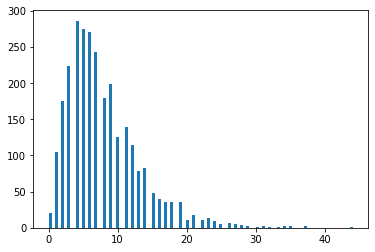

In [11]:
plt.hist(df['total_jargon_count'], bins = 100);

The total jargon count has a nice normal-looking distribution.

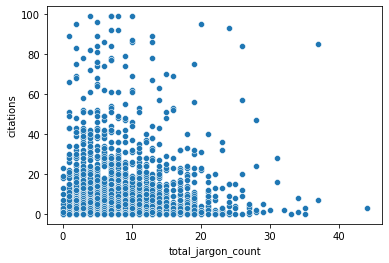

In [12]:
#scatterplot

sns.scatterplot(data = df,x='total_jargon_count', y='citations');

In [13]:
#save vectorized data 
df.to_csv('../data/pubmed_vectorized_jargon.csv')